<a href="https://colab.research.google.com/github/joaochenriques/Turbomachines_pyBEMT/blob/main/TidalExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib

if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

In [2]:
!pip install git+https://github.com/kegiljarhus/pybemt.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kegiljarhus/pybemt.git to /tmp/pip-req-build-johppuwy
  Running command git clone -q https://github.com/kegiljarhus/pybemt.git /tmp/pip-req-build-johppuwy
  Created wheel for pybemt: filename=pybemt-0.1.0-py3-none-any.whl size=27915 sha256=f13b51b295a1332a4be087d684608fe8cf51ed9a912197bb6bcf2a1923cda65a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ssbgb2z/wheels/1b/1f/d5/fe14d42d6aa7d8da937e514e51afa61c3093e395de3eba06e2
Successfully built pybemt


In [3]:
!curl -O https://raw.githubusercontent.com/kegiljarhus/pyBEMT/master/examples/tidal.ini

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   702  100   702    0     0   4909      0 --:--:-- --:--:-- --:--:--  4909


In [7]:
"""
Run analysis of power output and drag of a three-bladed tidal turbine.
The results are compared against cavitation tunnel tests presented in
    Bahaj, A. S., et al. "Power and thrust measurements of marine current 
    turbines under various hydrodynamic flow conditions in a cavitation 
    tunnel and a towing tank." Renewable energy 32.3 (2007): 407-426.
"""

import matplotlib.pyplot as pl
from pybemt.solver import Solver

# Run sweep of tip speed ratio with the BEMT method
s = Solver('tidal.ini')
df, section_df = s.run_sweep('rpm', 20, 150.0, 330.0)

# Experimental data 
cp_tsr = [4.170616, 4.423381,4.660348, 4.897314,5.134281,5.371248, 
        5.371248,5.592417, 5.845182, 6.082148,6.303318,6.540284, 6.777251,
        7.014218,7.219589, 7.440758, 7.693523]
cp = [0.413793, 0.430885, 0.437181, 0.446177,0.445277, 0.454273,
        0.457871,0.452474,0.454273,0.452474,0.449775,0.447976,0.441679,
        0.435382, 0.429085, 0.412894, 0.409295]
ct_tsr = [4.184953, 4.435737,4.670846, 4.905956, 5.141066,5.39185, 
        5.376176,5.611285, 5.862069,5.877743,6.097179,6.097179,6.316614,
        6.551724,6.786834,7.021944,7.257053, 7.460815,7.711599]
ct = [0.64451, 0.672997, 0.701484,0.726409, 0.740653, 0.753116,
        0.77270, 0.778042,0.795846,0.802967, 0.811869,0.817211,0.820772,
        0.836795, 0.851039,0.859941, 0.874184, 0.884866,0.890208]

--- Results ---
Trust (N):	 393.8589702704786
Torque (Nm):	 30.184079151788374
Power (W):	 474.13040659315595
--- Results ---
Trust (N):	 427.73912995484324
Torque (Nm):	 30.50093295363146
Power (W):	 509.3669577037424
--- Results ---
Trust (N):	 458.880902799565
Torque (Nm):	 30.41564669653846
Power (W):	 538.1174856376307
--- Results ---
Trust (N):	 485.82066523248966
Torque (Nm):	 30.042043671177534
Power (W):	 561.3118209300023
--- Results ---
Trust (N):	 510.3895494424186
Torque (Nm):	 29.498881274398293
Power (W):	 580.4285671258576
--- Results ---
Trust (N):	 533.4890311666318
Torque (Nm):	 28.815130427033065
Power (W):	 595.5618556697289
--- Results ---
Trust (N):	 554.5022671303415
Torque (Nm):	 28.02988328253727
Power (W):	 607.1400146096419
--- Results ---
Trust (N):	 573.5444238602308
Torque (Nm):	 27.171997551616684
Power (W):	 615.5146663756883
--- Results ---
Trust (N):	 590.7321264994973
Torque (Nm):	 26.2300305214617
Power (W):	 620.1990621116524
--- Results ---
Trust 

Text(0, 0.5, 'Power and thrust coefficients')

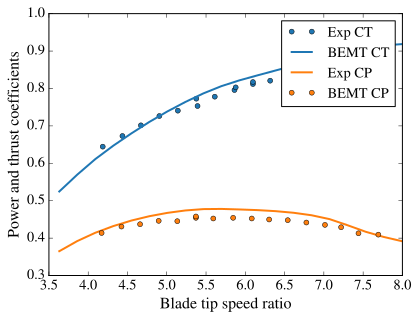

In [8]:
# Plot results
pl.plot(ct_tsr, ct, 'C0o')
ax = pl.gca()
df.plot(x='TSR', y='CT', style='C0-', linewidth=2, ax=ax) 

df.plot(x='TSR', y='CP', style='C1-', linewidth=2, ax=ax) 
pl.plot(cp_tsr, cp,'C1o')
pl.legend(('Exp CT', 'BEMT CT', 'Exp CP', 'BEMT CP'))
pl.xlabel('Blade tip speed ratio')
pl.ylabel('Power and thrust coefficients')